In [1]:
#!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org mftool
import warnings
warnings.filterwarnings('ignore')

# import module
from mftool import Mftool
import pandas as pd
import datetime
  
obj = Mftool()

data = obj.get_scheme_codes() 

df = pd.DataFrame.from_records([data])

df_scrips = df.melt(var_name="scrip", value_name="name")

In [5]:
pd.set_option('display.max_colwidth', None)

df_scrips[df_scrips['name'].str.lower().str.contains('tata.*digi', na=False)]

,scrip,name
4696,135795,TATA Digital India Fund Direct Plan - Payout of Income Distribution cum capital withdrawal option
4697,135798,TATA Digital India Fund Direct Plan - Reinvestment of Income Distribution cum capital withdrawal option
4698,135796,TATA Digital India Fund Regular Plan - Payout of Income Distribution cum capital withdrawal option
4699,135799,TATA Digital India Fund Regular Plan - Reinvestment of Income Distribution cum capital withdrawal option
4700,135800,Tata Digital India Fund-Direct Plan-Growth
4701,135797,Tata Digital India Fund-Regular Plan-Growth


In [3]:
#scrips = ['122639','118551','125354','120164','125307','120505','118834','118278','120465','118269','120823', '135800','120594']

scrips_dict = {118269:'LC-Canara',118278:'LMC-Canara',118551:'IFC-FF',118834:'LMC-Mirae',120164:'SC-Kotak',120465:'LC-Axis',
          120505:'MC-Axis',120594:'LMC-ICICI',135800:'LMC-Tata',122639:'IFC-PP',125307:'MC-PGIM',125354:'SC-Axis',120823:'LMC-Quant',
              145110:'LMC-Axis'}

start_date = '01-01-2014'
end_date = (datetime.date.today() + datetime.timedelta(days=1)).strftime('%d-%m-%Y')

In [4]:
df_mfnav = pd.DataFrame()

for key in scrips_dict:
    obj.get_scheme_details(key)
    tmp = obj.get_scheme_historical_nav_for_dates(key, start_date, end_date)
    tmp = pd.DataFrame(tmp['data'])
    #tmp.columns = ['date', scrip_id]
    tmp['scrip'] = scrips_dict[key]
    df_mfnav = df_mfnav.append(tmp)
df_mfnav

,date,nav,scrip
0,27-12-2021,45.23000,LC-Canara
1,24-12-2021,45.03000,LC-Canara
2,23-12-2021,45.25000,LC-Canara
3,22-12-2021,44.90000,LC-Canara
4,21-12-2021,44.32000,LC-Canara
...,...,...,...
775,01-11-2018,10.03000,LMC-Axis
776,31-10-2018,10.02000,LMC-Axis
777,30-10-2018,10.02000,LMC-Axis
778,29-10-2018,10.02000,LMC-Axis


In [5]:
df_mfnav['nav'] = df_mfnav['nav'].astype('float64')
df_mfnav = df_mfnav.reset_index()
df_mfnav['date'] = pd.to_datetime(df_mfnav['date'],format= '%d-%m-%Y') 
df_mfnav = df_mfnav.pivot_table('nav', ['date'], 'scrip')
#df_mfnav.columns = ['LC-Canara','LMC-Canara','IFC-FF','LMC-Mirae','SC-Kotak','LC-Axis','MC-Axis','LMC-ICICI','MC-Quant','IFC-PP','MC-PGIM','SC-Axis','LMC-Tata']
df_mfnav

scrip,IFC-FF,IFC-PP,LC-Axis,LC-Canara,LMC-Axis,LMC-Canara,LMC-ICICI,LMC-Mirae,LMC-Quant,LMC-Tata,MC-Axis,MC-PGIM,SC-Axis,SC-Kotak
date,,,,,,,,,,,,,,
2014-01-01,NaN,11.1989,13.86,12.61,NaN,28.72,31.65,15.343,70.7603,NaN,14.25,10.11,10.19,29.005
2014-01-02,17.6588,11.1112,13.68,12.46,NaN,28.20,31.61,15.143,70.0125,NaN,13.99,10.07,10.12,28.682
2014-01-03,17.6962,11.0683,13.68,12.51,NaN,28.34,32.11,15.222,70.5300,NaN,14.01,10.12,10.16,28.781
2014-01-06,17.5891,11.0960,13.67,12.48,NaN,28.53,31.97,15.342,70.5636,NaN,14.06,10.12,10.16,28.792
2014-01-07,17.7415,11.0785,13.62,12.45,NaN,28.46,31.77,15.315,70.8257,NaN,14.00,10.11,10.16,28.704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21,64.8542,52.4140,49.71,44.32,21.60,174.54,176.45,103.077,418.1552,42.6728,74.97,46.66,65.15,182.232
2021-12-22,65.4239,53.1946,50.37,44.90,21.91,177.46,179.06,104.198,424.6718,43.2514,75.93,47.24,66.32,183.790
2021-12-23,65.4943,53.5286,50.65,45.25,22.02,178.77,180.90,104.854,428.8279,43.6565,76.41,47.50,66.76,185.153


In [6]:
# check missing values
missing_df = df_mfnav.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count
11,MC-PGIM,1
1,IFC-PP,2
2,LC-Axis,2
5,LMC-Canara,2
6,LMC-ICICI,2
7,LMC-Mirae,2
10,MC-Axis,2
12,SC-Axis,2
13,SC-Kotak,2
3,LC-Canara,3


In [7]:
scrips = ['IFC-PP','SC-Axis','SC-Kotak','MC-Axis','LMC-Mirae','LMC-Canara','LMC-Quant','LMC-ICICI','MC-PGIM']
df_mfnav = df_mfnav[scrips]
df_mfnav = df_mfnav.dropna()

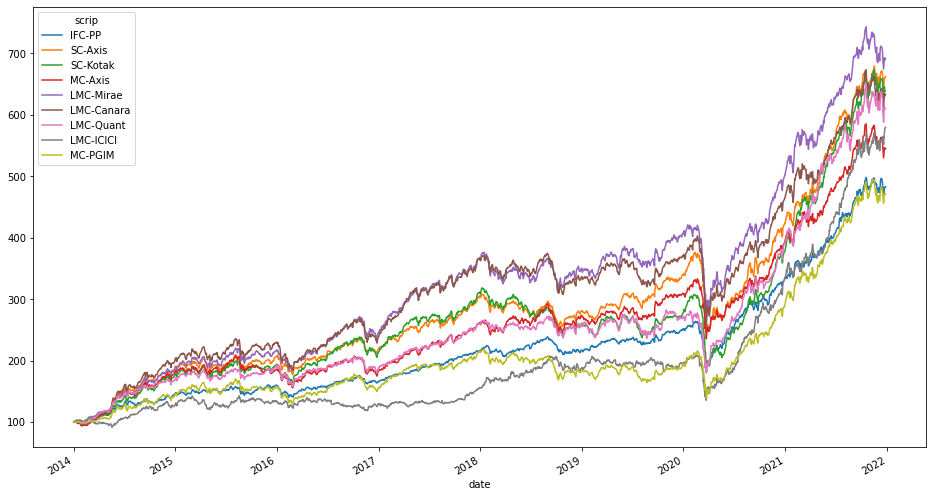

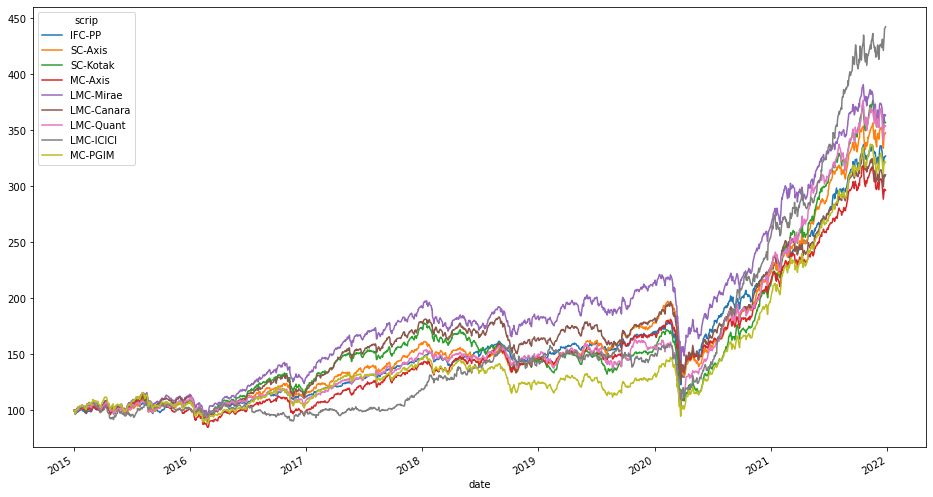

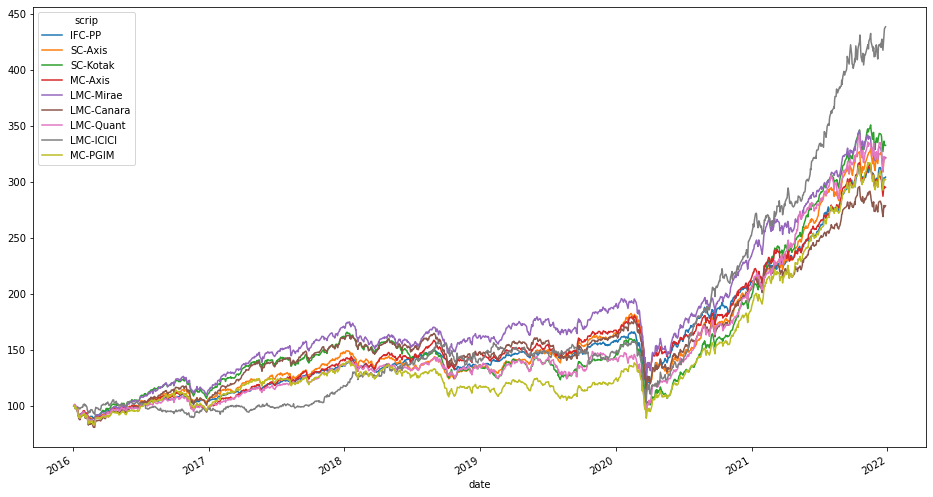

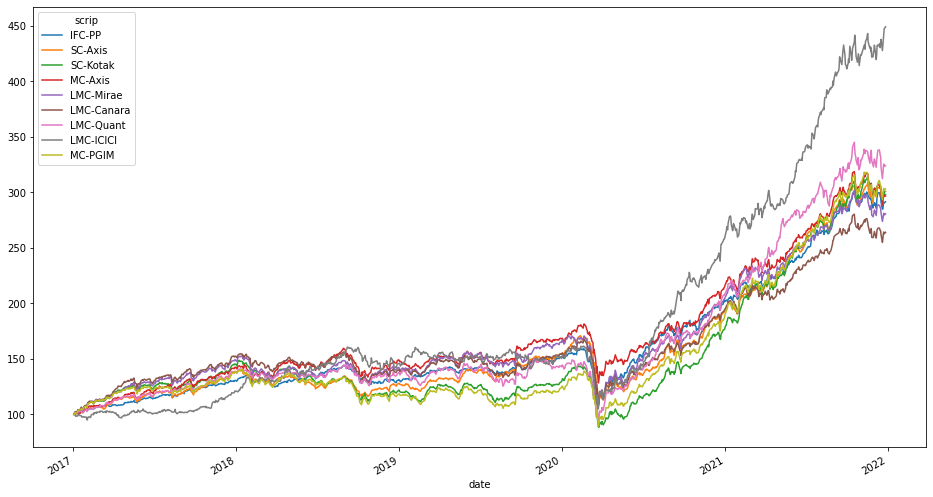

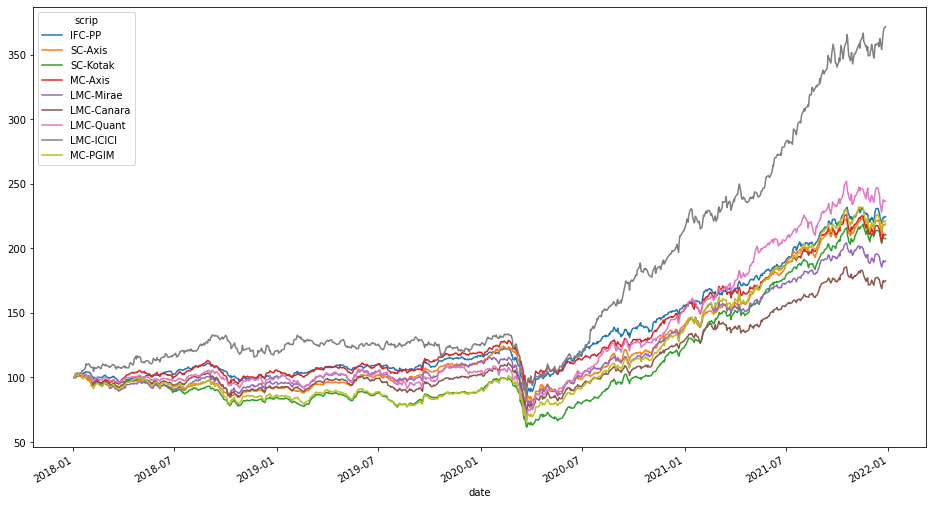

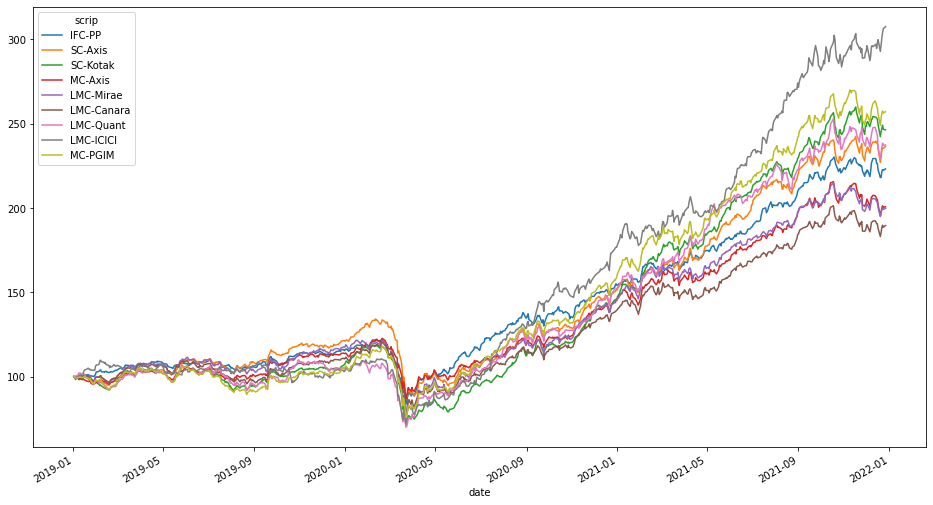

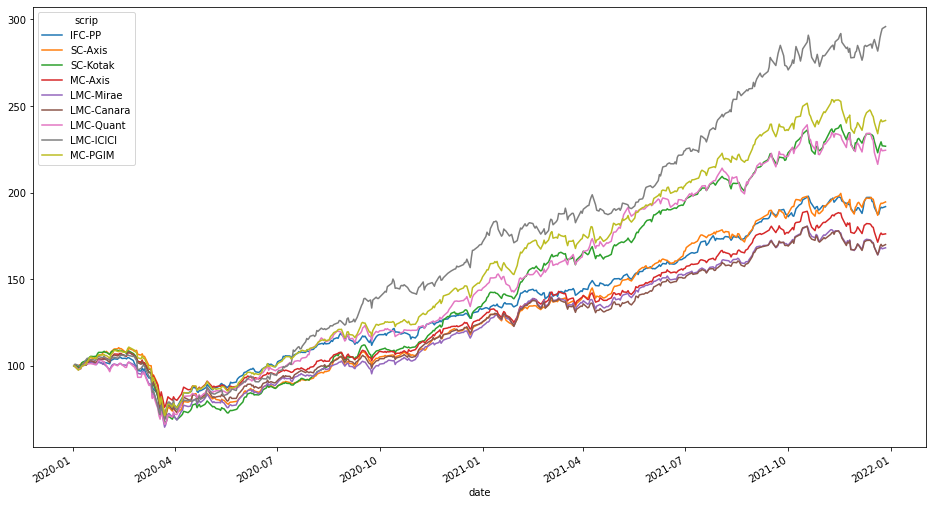

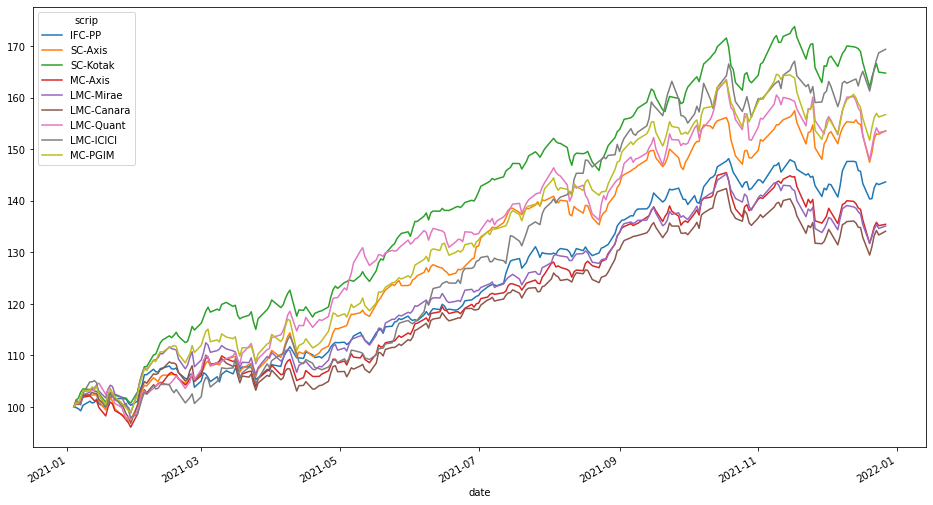

In [8]:
years = ['2014-01-01','2015-01-01','2016-01-01','2017-01-01', '2018-01-01','2019-01-01','2020-01-01','2021-01-01']

for year in years:
    scrips = ['IFC-PP','SC-Axis','SC-Kotak','MC-Axis','LMC-Mirae','LMC-Canara','LMC-Quant','LMC-ICICI','MC-PGIM']
    tmp = df_mfnav[df_mfnav.index > year][scrips]
    for scrip_id in scrips:
        tmp[scrip_id] = round(tmp[scrip_id]*100/(tmp[scrip_id][0]),2)

    tmp.plot.line(figsize=(16,9))

In [9]:
'''
years = ['2016-01-01','2017-01-01', '2018-01-01','2019-01-01','2020-01-01','2021-01-01','2022-01-01']

for year in years:
    scrips = ['IFC-PP','SC-Axis','SC-Kotak','MC-Axis','LMC-Mirae','LMC-Canara','LMC-Quant','LMC-Tata','LMC-ICICI','MC-PGIM']
    tmp = df_mfnav[df_mfnav.index < year][scrips]
    for scrip_id in scrips:
        tmp[scrip_id] = round(tmp[scrip_id]*100/(tmp[scrip_id][0]),2)

    tmp.plot.line(figsize=(16,9))
'''

"\nyears = ['2016-01-01','2017-01-01', '2018-01-01','2019-01-01','2020-01-01','2021-01-01','2022-01-01']\n\nfor year in years:\n    scrips = ['IFC-PP','SC-Axis','SC-Kotak','MC-Axis','LMC-Mirae','LMC-Canara','LMC-Quant','LMC-Tata','LMC-ICICI','MC-PGIM']\n    tmp = df_mfnav[df_mfnav.index < year][scrips]\n    for scrip_id in scrips:\n        tmp[scrip_id] = round(tmp[scrip_id]*100/(tmp[scrip_id][0]),2)\n\n    tmp.plot.line(figsize=(16,9))\n"

<AxesSubplot:xlabel='date'>

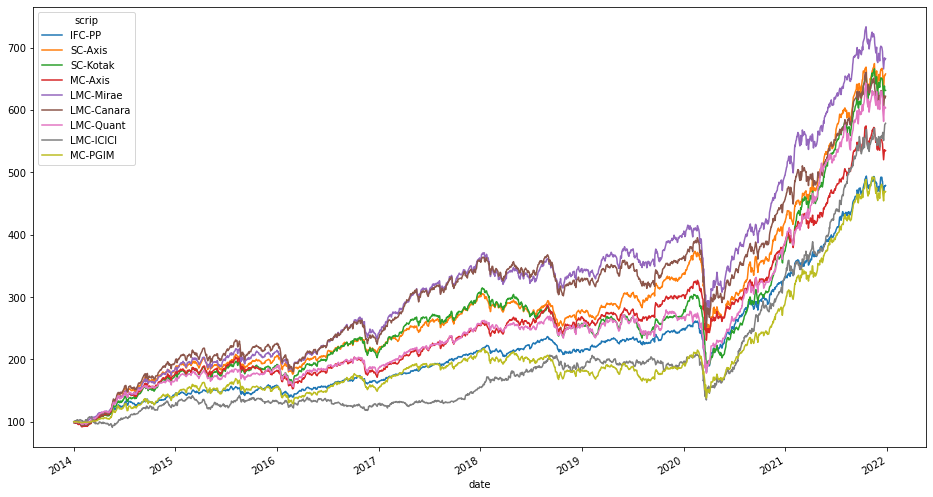

In [10]:
scrips =['IFC-PP','SC-Axis','SC-Kotak','MC-Axis','LMC-Mirae','LMC-Canara','LMC-Quant','LMC-ICICI','MC-PGIM']
tmp = df_mfnav[scrips]
for scrip_id in scrips:
    tmp[scrip_id] = round(tmp[scrip_id]*100/(tmp[scrip_id][0]),2)

tmp.plot.line(figsize=(16,9))

In [11]:
tmp

scrip,IFC-PP,SC-Axis,SC-Kotak,MC-Axis,LMC-Mirae,LMC-Canara,LMC-Quant,LMC-ICICI,MC-PGIM
date,,,,,,,,,
2014-01-01,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-02,99.22,99.31,98.89,98.18,98.70,98.19,98.94,99.87,99.60
2014-01-03,98.83,99.71,99.23,98.32,99.21,98.68,99.67,101.45,100.10
2014-01-06,99.08,99.71,99.27,98.67,99.99,99.34,99.72,101.01,100.10
2014-01-07,98.92,99.71,98.96,98.25,99.82,99.09,100.09,100.38,100.00
...,...,...,...,...,...,...,...,...,...
2021-12-21,468.03,639.35,628.28,526.11,671.82,607.73,590.95,557.50,461.52
2021-12-22,475.00,650.83,633.65,532.84,679.12,617.90,600.16,565.75,467.26
2021-12-23,477.98,655.15,638.35,536.21,683.40,622.46,606.03,571.56,469.83


In [12]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
import yfinance as yfin
yfin.pdr_override()

start_date = '2014-01-01'
end_date = '2022-01-01'

stock_symbol = '^NSEI'
start = datetime.datetime(*map(int, start_date.split('-')))
end = datetime.datetime(*map(int, end_date.split('-'))) 
stock_df = web.DataReader(stock_symbol,  data_source='yahoo', start = start, end = end)['Close']
stock_df = pd.DataFrame(stock_df) # convert Series object to dataframe 
stock_df.columns = {'Close Price'} # assign new colun name
stock_df.dropna(axis = 0, inplace = True) # remove any null rows 

[*********************100%***********************]  1 of 1 completed


In [13]:
stock_df

,Close Price
Date,
2014-01-02,6221.149902
2014-01-03,6211.149902
2014-01-06,6191.450195
2014-01-07,6162.250000
2014-01-08,6174.600098
...,...
2021-12-22,16955.449219
2021-12-23,17072.599609
2021-12-24,17003.750000


In [14]:
stock_df.columns = ['NSE-Nifty']
stock_df

,NSE-Nifty
Date,
2014-01-02,6221.149902
2014-01-03,6211.149902
2014-01-06,6191.450195
2014-01-07,6162.250000
2014-01-08,6174.600098
...,...
2021-12-22,16955.449219
2021-12-23,17072.599609
2021-12-24,17003.750000


In [15]:
df_mfnav = tmp.join(stock_df)
df_mfnav = df_mfnav.dropna()
df_mfnav

,IFC-PP,SC-Axis,SC-Kotak,MC-Axis,LMC-Mirae,LMC-Canara,LMC-Quant,LMC-ICICI,MC-PGIM,NSE-Nifty
date,,,,,,,,,,
2014-01-02,99.22,99.31,98.89,98.18,98.70,98.19,98.94,99.87,99.60,6221.149902
2014-01-03,98.83,99.71,99.23,98.32,99.21,98.68,99.67,101.45,100.10,6211.149902
2014-01-06,99.08,99.71,99.27,98.67,99.99,99.34,99.72,101.01,100.10,6191.450195
2014-01-07,98.92,99.71,98.96,98.25,99.82,99.09,100.09,100.38,100.00,6162.250000
2014-01-08,99.52,99.90,99.54,98.81,100.43,99.72,99.84,101.45,100.20,6174.600098
...,...,...,...,...,...,...,...,...,...,...
2021-12-21,468.03,639.35,628.28,526.11,671.82,607.73,590.95,557.50,461.52,16770.849609
2021-12-22,475.00,650.83,633.65,532.84,679.12,617.90,600.16,565.75,467.26,16955.449219
2021-12-23,477.98,655.15,638.35,536.21,683.40,622.46,606.03,571.56,469.83,17072.599609


<AxesSubplot:xlabel='date'>

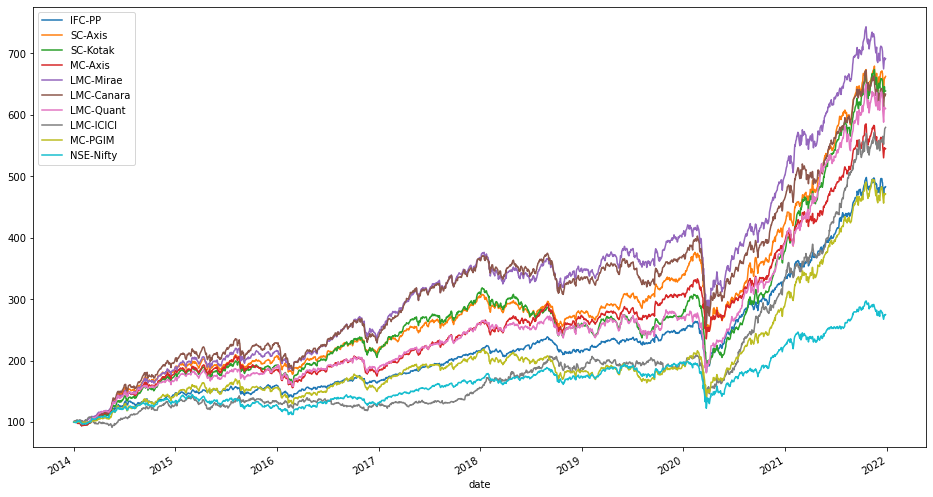

In [16]:

scrips = ['IFC-PP','SC-Axis','SC-Kotak','MC-Axis','LMC-Mirae','LMC-Canara','LMC-Quant','LMC-ICICI','MC-PGIM','NSE-Nifty']
tmp = df_mfnav[scrips]
for scrip_id in scrips:
    tmp[scrip_id] = round(tmp[scrip_id]*100/(tmp[scrip_id][0]),2)

tmp.plot.line(figsize=(16,9))

In [17]:
'''
years = ['2016-01-01','2017-01-01', '2018-01-01','2019-01-01','2020-01-01','2021-01-01','2022-01-01']

for year in years:
    scrips = ['IFC-PP','SC-Axis','SC-Kotak','MC-Axis','LMC-Mirae','LMC-Canara','LMC-Quant','LMC-Tata','LMC-ICICI','MC-PGIM','NSE-Nifty']
    tmp = df_mfnav[df_mfnav.index < year][scrips]
    for scrip_id in scrips:
        tmp[scrip_id] = round(tmp[scrip_id]*100/(tmp[scrip_id][0]),2)

    tmp.plot.line(figsize=(16,9))
'''

"\nyears = ['2016-01-01','2017-01-01', '2018-01-01','2019-01-01','2020-01-01','2021-01-01','2022-01-01']\n\nfor year in years:\n    scrips = ['IFC-PP','SC-Axis','SC-Kotak','MC-Axis','LMC-Mirae','LMC-Canara','LMC-Quant','LMC-Tata','LMC-ICICI','MC-PGIM','NSE-Nifty']\n    tmp = df_mfnav[df_mfnav.index < year][scrips]\n    for scrip_id in scrips:\n        tmp[scrip_id] = round(tmp[scrip_id]*100/(tmp[scrip_id][0]),2)\n\n    tmp.plot.line(figsize=(16,9))\n"

<AxesSubplot:xlabel='date'>

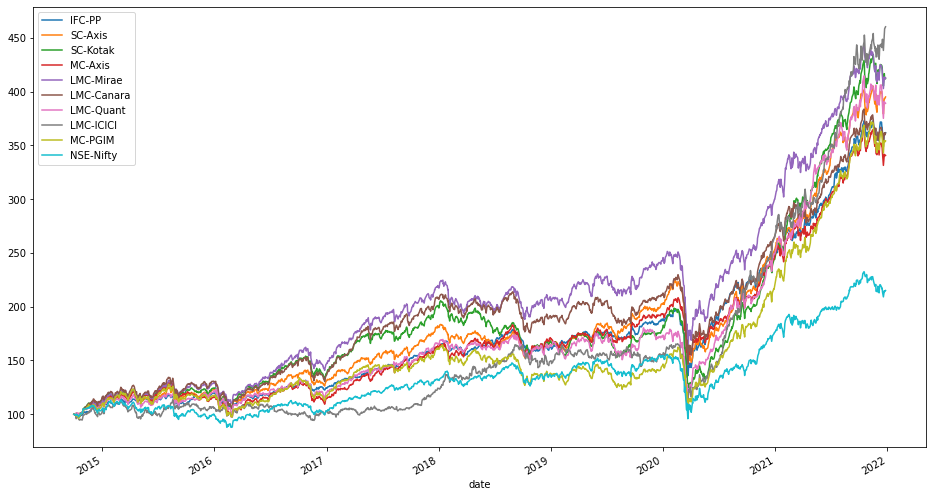

In [18]:
scrips = ['IFC-PP','SC-Axis','SC-Kotak','MC-Axis','LMC-Mirae','LMC-Canara','LMC-Quant','LMC-ICICI','MC-PGIM','NSE-Nifty']
tmp = df_mfnav[(df_mfnav.index < '2022-01-01') & (df_mfnav.index >= '2014-10-01')][scrips]
for scrip_id in scrips:
    tmp[scrip_id] = round(tmp[scrip_id]*100/(tmp[scrip_id][0]),2)
    
tmp.plot.line(figsize=(16,9))

In [19]:
tmp['Prev_NSE'] = tmp['NSE-Nifty'].shift(1)
tmp['Change%'] = round((tmp['NSE-Nifty'] - tmp['Prev_NSE'])*100/tmp['Prev_NSE'],2)
tmp[tmp['Change%'] < -1]

,IFC-PP,SC-Axis,SC-Kotak,MC-Axis,LMC-Mirae,LMC-Canara,LMC-Quant,LMC-ICICI,MC-PGIM,NSE-Nifty,Prev_NSE,Change%
date,,,,,,,,,,,,
2014-10-07,98.80,99.12,98.73,98.57,99.06,98.98,100.21,98.77,98.66,98.83,100.00,-1.17
2014-10-10,98.33,99.53,98.63,98.75,98.61,99.84,100.28,97.76,98.14,98.92,100.19,-1.27
2014-10-16,97.05,98.58,97.31,97.90,97.59,97.91,99.53,95.95,95.97,97.52,98.97,-1.47
2014-12-08,107.02,108.78,111.39,110.78,110.12,112.59,107.43,101.58,107.40,106.20,107.46,-1.17
2014-12-09,106.23,108.20,110.15,109.57,108.69,110.85,106.33,100.88,105.90,104.97,106.20,-1.16
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-26,359.86,386.55,414.75,342.49,411.45,355.21,394.57,432.32,347.28,214.29,220.71,-2.91
2021-12-03,360.40,394.63,420.38,346.70,417.25,360.50,394.69,440.74,351.02,216.43,219.01,-1.18
2021-12-06,354.38,388.61,415.38,341.11,410.72,354.35,387.57,430.16,345.86,212.85,216.43,-1.65


In [20]:
tmp_bod = tmp[tmp['Change%'] < -1]
def get_bod_returns(tmp_bod):    
    
    for i in range(10):
        funds_bod = 0
        invs_amt = 0
        for index, row in tmp_bod.iterrows():

            funds_bod += 10000*abs(int(row['Change%']))/row[tmp.columns[i]]  
            invs_amt += 10000*abs(int(row['Change%']))
            
        returns = round((tmp.tail(1)[tmp.columns[i]].values[0]*funds_bod*100)/(tmp_bod.shape[0]*10000) -100,2)
        print(tmp.columns[i] + ': ' + str(returns) + '%')

get_bod_returns(tmp_bod)

IFC-PP: 256.76%
SC-Axis: 275.24%
SC-Kotak: 305.2%
MC-Axis: 232.74%
LMC-Mirae: 254.52%
LMC-Canara: 227.87%
LMC-Quant: 304.16%
LMC-ICICI: 416.59%
MC-PGIM: 293.02%
NSE-Nifty: 166.74%


In [21]:
tmp_sip = tmp[tmp.index == tmp[tmp.index.month == 0].index.min()]
years = [2022,2021,2020,2019,2018,2017,2016,2015,2014]

for year in years:
    for i in range(12):
        tmp_sip = tmp_sip.append(tmp[tmp.index == tmp[(tmp.index.month == i+1) & (tmp.index.year == year)].index.min()])

def get_sip_returns(tmp_sip):    
      
    for i in range(10):
        funds_sip = 0
        for index, row in tmp_sip.iterrows():

            funds_sip += 10000/row[tmp.columns[i]]       
            
        returns = round((tmp.tail(1)[tmp.columns[i]].values[0]*funds_sip*100)/(tmp_sip.shape[0]*10000) -100,2)
        print(tmp.columns[i] + ': ' + str(returns) + '%')

get_sip_returns(tmp_sip)

IFC-PP: 135.14%
SC-Axis: 147.1%
SC-Kotak: 153.3%
MC-Axis: 121.62%
LMC-Mirae: 127.97%
LMC-Canara: 109.98%
LMC-Quant: 156.07%
LMC-ICICI: 240.45%
MC-PGIM: 147.88%
NSE-Nifty: 68.79%


In [22]:
tmp_sip['Type'] = 'SIP'
tmp_bod['Type'] = 'BOD'

tmp_cmb = tmp_sip.append(tmp_bod)            
                         
def get_cmb_returns(tmp_cmb):    
      
    for i in range(10):
        funds_cmb = 0  
        tot_inv = 0
        for index, row in tmp_cmb.iterrows():
            if row['Type'] == 'SIP':
                inv_amt = 5000
                funds_cmb += inv_amt/row[tmp.columns[i]]  
            else:
                inv_amt = 10000
                funds_cmb += inv_amt*abs(int(row['Change%']))/row[tmp.columns[i]] 
            
            tot_inv += inv_amt
            
        returns = round((tmp.tail(1)[tmp.columns[i]].values[0]*funds_cmb*100)/(tot_inv) -100,2)
        print(tmp.columns[i] + ': ' + str(returns) + '%')
        
get_cmb_returns(tmp_cmb)

IFC-PP: 234.58%
SC-Axis: 251.87%
SC-Kotak: 277.49%
MC-Axis: 212.47%
LMC-Mirae: 231.44%
LMC-Canara: 206.36%
LMC-Quant: 277.15%
LMC-ICICI: 384.46%
MC-PGIM: 266.55%
NSE-Nifty: 148.88%


In [73]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
import yfinance as yfin
yfin.pdr_override()

start_date = '1998-01-01'
end_date = '2022-01-01'

stock_symbol = 'HDFCBANK.NS'
start = datetime.datetime(*map(int, start_date.split('-')))
end = datetime.datetime(*map(int, end_date.split('-'))) 
stock_df = web.DataReader(stock_symbol,  data_source='yahoo', start = start, end = end)['Close']
stock_df = pd.DataFrame(stock_df) # convert Series object to dataframe 
stock_df.columns = {'Close Price'} # assign new colun name
stock_df.dropna(axis = 0, inplace = True) # remove any null rows 
stock_df.columns = ['NSE-Nifty']
tmp = stock_df
tmp['Year'] = tmp.index.year
tmp

[*********************100%***********************]  1 of 1 completed


,NSE-Nifty,Year
Date,,
1998-01-01,8.075000,1998
1998-01-02,8.085000,1998
1998-01-05,7.990000,1998
1998-01-06,7.825000,1998
1998-01-07,7.810000,1998
...,...,...
2021-12-22,1445.199951,2021
2021-12-23,1444.099976,2021
2021-12-24,1438.900024,2021


In [74]:
tmp['Prev_NSE'] = tmp['NSE-Nifty'].shift(1)
tmp['Change%'] = round((tmp['NSE-Nifty'] - tmp['Prev_NSE'])*100/tmp['Prev_NSE'],2)
tmp[tmp['Change%'] < -1]

,NSE-Nifty,Year,Prev_NSE,Change%
Date,,,,
1998-01-05,7.990000,1998,8.085000,-1.18
1998-01-06,7.825000,1998,7.990000,-2.07
1998-01-08,7.710000,1998,7.810000,-1.28
1998-01-09,7.550000,1998,7.710000,-2.08
1998-01-12,7.070000,1998,7.550000,-6.36
...,...,...,...,...
2021-11-22,1515.349976,2021,1539.400024,-1.56
2021-11-26,1489.900024,2021,1525.949951,-2.36
2021-12-09,1526.849976,2021,1553.800049,-1.73


In [75]:
tmp_bod = tmp[tmp['Change%'] < -1]
def get_bod_returns(tmp_bod):    
    
    for i in range(1):
        funds_bod = 0
        invs_amt = 0
        for index, row in tmp_bod.iterrows():

            funds_bod += 10000*abs(round(row['Change%'],0))/row[tmp.columns[i]]  
            invs_amt += 10000*abs(round(row['Change%'],0))
            
        returns = round((tmp_bod.tail(1)[tmp_bod.columns[i]].values[0]*funds_bod*100)/(invs_amt) -100,2)
        print(tmp.columns[i] + ': ' + str(returns) + '%')
        print('Invested: '+ str(invs_amt))
        print('Return: '+ str(round(tmp_bod.tail(1)[tmp_bod.columns[i]].values[0]*funds_bod,0)))
        

get_bod_returns(tmp_bod)

NSE-Nifty: 5229.83%
Invested: 32050000.0
Return: 1708212076.0


In [76]:
tmp_sip = tmp[tmp.index == tmp[tmp.index.month == 0].index.min()]
years = [2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008]

for year in years:
    for i in range(12):
        tmp_sip = tmp_sip.append(tmp[tmp.index == tmp[(tmp.index.month == i+1) & (tmp.index.year == year)].index.min()])

def get_sip_returns(tmp_sip):    
      
    for i in range(1):
        funds_sip = 0
        for index, row in tmp_sip.iterrows():

            funds_sip += 10000/row[tmp.columns[i]]       
            
        returns = round((tmp_sip.tail(1)[tmp_sip.columns[i]].values[0]*funds_sip*100)/(tmp_sip.shape[0]*10000) -100,2)
        print(tmp.columns[i] + ': ' + str(returns) + '%')
        print('Invested: '+ str(tmp_sip.shape[0]*10000))
        print('Return: '+ str(round(tmp_sip.tail(1)[tmp_sip.columns[i]].values[0]*funds_sip,0)))

get_sip_returns(tmp_sip.sort_index())

NSE-Nifty: 363.27%
Invested: 1680000
Return: 7782921.0


In [77]:
years = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

for year in years:
    print('Year: '+ str(year))
    print('----------')
    tmp_sip_year = tmp_sip[tmp_sip['Year'] <= year]
    tmp_bod_year = tmp_bod[tmp_bod['Year'] <= year]
    print('--BOD--')
    get_bod_returns(tmp_bod_year)
    print('--SIP--')
    get_sip_returns(tmp_sip_year.sort_index())
    print('==============')    

Year: 2009
----------
--BOD--
NSE-Nifty: 787.66%
Invested: 22100000.0
Return: 196172783.0
--SIP--
NSE-Nifty: 43.77%
Invested: 240000
Return: 345040.0
Year: 2010
----------
--BOD--
NSE-Nifty: 1015.18%
Invested: 23020000.0
Return: 256714357.0
--SIP--
NSE-Nifty: 66.56%
Invested: 360000
Return: 599615.0
Year: 2011
----------
--BOD--
NSE-Nifty: 943.07%
Invested: 24390000.0
Return: 254405287.0
--SIP--
NSE-Nifty: 44.16%
Invested: 480000
Return: 691970.0
Year: 2012
----------
--BOD--
NSE-Nifty: 1504.36%
Invested: 25000000.0
Return: 401089194.0
--SIP--
NSE-Nifty: 99.7%
Invested: 600000
Return: 1198229.0
Year: 2013
----------
--BOD--
NSE-Nifty: 1385.36%
Invested: 26350000.0
Return: 391392708.0
--SIP--
NSE-Nifty: 77.21%
Invested: 720000
Return: 1275899.0
Year: 2014
----------
--BOD--
NSE-Nifty: 1994.9%
Invested: 26900000.0
Return: 563527038.0
--SIP--
NSE-Nifty: 135.74%
Invested: 840000
Return: 1980188.0
Year: 2015
----------
--BOD--
NSE-Nifty: 2163.5%
Invested: 27590000.0
Return: 624499958.0
--SI

In [40]:
years = [2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009]

for year in years:
    print('Year: '+ str(year))
    print('----------')
    tmp_sip_year = tmp_sip[tmp_sip['Year'] >= year]
    tmp_bod_year = tmp_bod[tmp_bod['Year'] >= year]
    print('--BOD--')
    get_bod_returns(tmp_bod_year)
    print('--SIP--')
    get_sip_returns(tmp_sip_year.sort_index())
    print('==============')    

Year: 2021
----------
--BOD--
NSE-Nifty: 9.07%
Invested: 500000.0
Return: 545330.0
--SIP--
NSE-Nifty: 9.39%
Invested: 120000
Return: 131271.0
Year: 2020
----------
--BOD--
NSE-Nifty: 54.31%
Invested: 1680000.0
Return: 2592409.0
--SIP--
NSE-Nifty: 34.26%
Invested: 240000
Return: 322217.0
Year: 2019
----------
--BOD--
NSE-Nifty: 53.6%
Invested: 1950000.0
Return: 2995138.0
--SIP--
NSE-Nifty: 39.73%
Invested: 360000
Return: 503037.0
Year: 2018
----------
--BOD--
NSE-Nifty: 54.13%
Invested: 2270000.0
Return: 3498830.0
--SIP--
NSE-Nifty: 44.65%
Invested: 480000
Return: 694316.0
Year: 2017
----------
--BOD--
NSE-Nifty: 54.81%
Invested: 2360000.0
Return: 3653490.0
--SIP--
NSE-Nifty: 51.98%
Invested: 600000
Return: 911907.0
Year: 2016
----------
--BOD--
NSE-Nifty: 65.31%
Invested: 2870000.0
Return: 4744257.0
--SIP--
NSE-Nifty: 61.97%
Invested: 720000
Return: 1166220.0
Year: 2015
----------
--BOD--
NSE-Nifty: 71.73%
Invested: 3430000.0
Return: 5890430.0
--SIP--
NSE-Nifty: 68.24%
Invested: 840000

In [78]:
starts = [1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011]
for start in starts:
    end = start+10
    print('By Year: '+ str(end))
    print('----------')
    tmp_sip_year = tmp_sip[(tmp_sip['Year'] >= start) & (tmp_sip['Year'] <= end)]
    tmp_bod_year = tmp_bod[(tmp_bod['Year'] >= start) & (tmp_bod['Year'] <= end)]
    print('--BOD--')
    get_bod_returns(tmp_bod_year)
    print('--SIP--')
    get_sip_returns(tmp_sip_year.sort_index())
    print('==============') 

By Year: 2009
----------
--BOD--
NSE-Nifty: 536.39%
Invested: 19390000.0
Return: 123396374.0
--SIP--
NSE-Nifty: 43.77%
Invested: 240000
Return: 345040.0
By Year: 2010
----------
--BOD--
NSE-Nifty: 392.16%
Invested: 17810000.0
Return: 87654299.0
--SIP--
NSE-Nifty: 66.56%
Invested: 360000
Return: 599615.0
By Year: 2011
----------
--BOD--
NSE-Nifty: 286.43%
Invested: 16750000.0
Return: 64726565.0
--SIP--
NSE-Nifty: 44.16%
Invested: 480000
Return: 691970.0
By Year: 2012
----------
--BOD--
NSE-Nifty: 396.57%
Invested: 15740000.0
Return: 78160446.0
--SIP--
NSE-Nifty: 99.7%
Invested: 600000
Return: 1198229.0
By Year: 2013
----------
--BOD--
NSE-Nifty: 290.58%
Invested: 16150000.0
Return: 63079467.0
--SIP--
NSE-Nifty: 77.21%
Invested: 720000
Return: 1275899.0
By Year: 2014
----------
--BOD--
NSE-Nifty: 356.35%
Invested: 15550000.0
Return: 70962298.0
--SIP--
NSE-Nifty: 135.74%
Invested: 840000
Return: 1980188.0
By Year: 2015
----------
--BOD--
NSE-Nifty: 311.35%
Invested: 15080000.0
Return: 620

In [29]:
tmp_sip.shape[0]

156

In [30]:
tmp_bod.shape[0]

424

In [31]:
tmp_bod.shape[0]/tmp_sip.shape[0]

2.717948717948718

<AxesSubplot:xlabel='Date'>

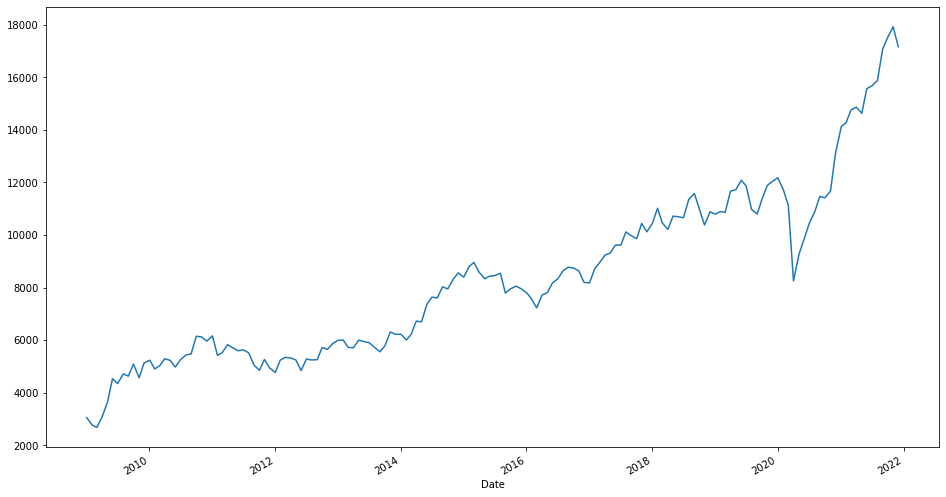

In [38]:
tmp_sip['NSE-Nifty'].plot.line(figsize=(16,9))

<AxesSubplot:xlabel='Date'>

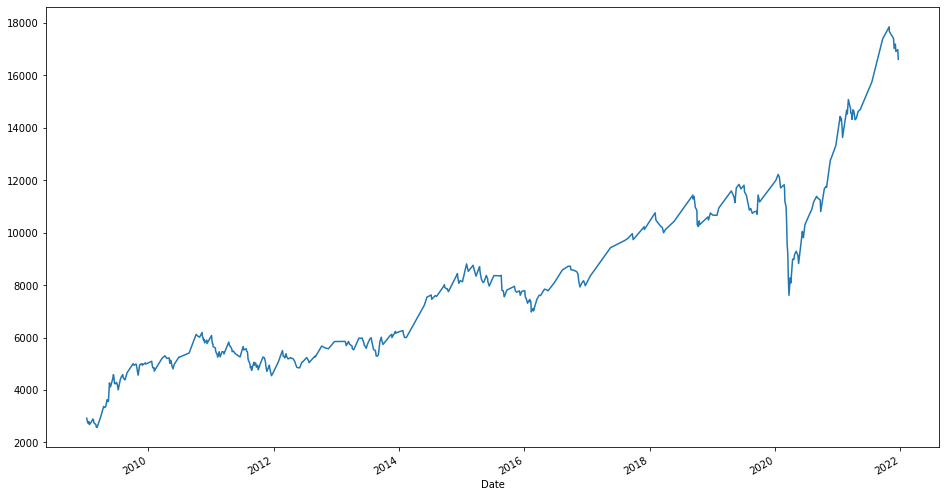

In [39]:
tmp_bod['NSE-Nifty'].plot.line(figsize=(16,9))